In [145]:
import json
import re
import pandas as pd
import numpy as np
import scrapy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import warnings
warnings.simplefilter('ignore')

# Read data

In [146]:
csv_file_path = 'cars_info_preprocessed.csv'
dataframe = pd.read_csv(csv_file_path)
dataframe.head(5)


,ID,Name,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,11530130,2010 Toyota Rukus Build 2 AZE151R,9999,Toyota,Rukus,Build 2,AZE151R,2010,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey,5
1,12190570,2021 Mercedes-Benz V 250 D Avantgarde MWB 447 ...,117990,Mercedes-Benz,V,250 D Avantgarde MWB,447 MY21,2021,19,Wagon,Automatic,Diesel,New In Stock,2143,Black,7
2,12321855,2021 Mercedes-Benz Valente 116 CDI MWB RWD 447...,79990,Mercedes-Benz,Valente,116 CDI MWB RWD,447 MY21,2021,24,Wagon,Automatic,Diesel,New In Stock,2143,Black,8
3,12346971,2010 Mercedes-Benz E250 CDI Avantgarde 207,34990,Mercedes-Benz,E250,CDI Avantgarde,207,2010,120579,Cabriolet,Automatic,Diesel,Used,2143,Black,4
4,12363884,2016 Holden Cruze CD JH MY16,15990,Holden,Cruze,CD,JH MY16,2016,72506,Sportswagon,Automatic,Unleaded Petrol,Used,1796,White,5


Sử dụng Linear Regression (hồi quy tuyến tính) để dự đoán giá tiền của xe dựa trên Year, Kilometers, CC, Status, Seating Capacity.

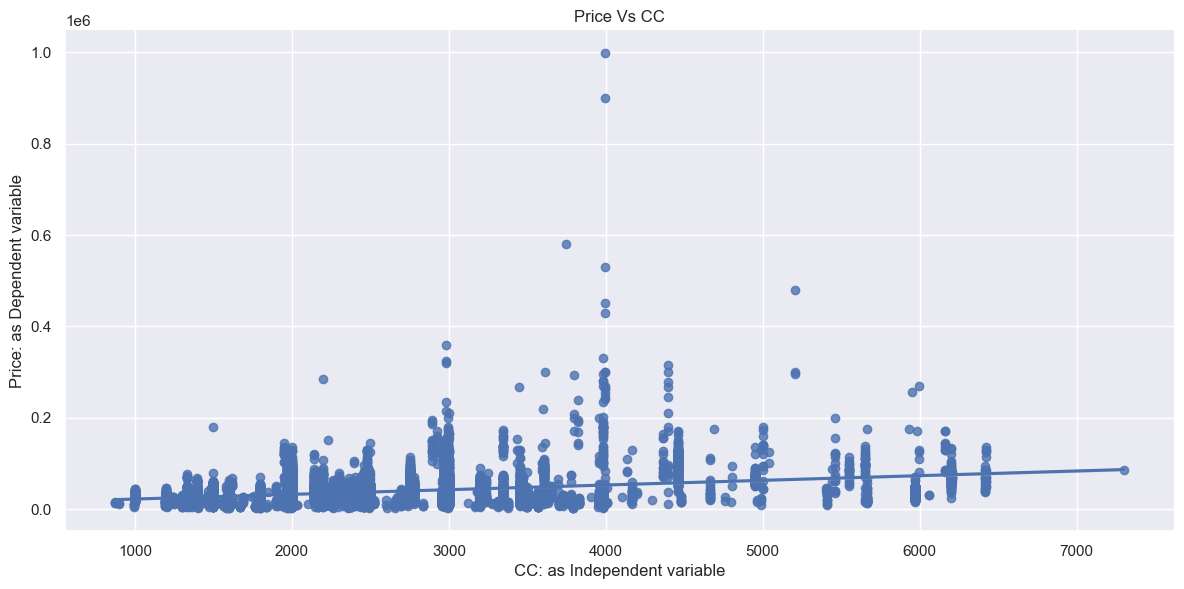

In [147]:
df = dataframe.drop(columns = ['ID','Name','Brand','Model','Variant','Series','Type','Status','Color'])
df["Gearbox"]=df["Gearbox"].replace("Automatic", "1")
df["Gearbox"]=df["Gearbox"].replace("Manual", "2")
df["Gearbox"]=df["Gearbox"].replace("Front", "3")
df["Gearbox"]=df["Gearbox"].replace("Gearbox", "4")
df["Gearbox"]=df["Gearbox"].replace("Rear", "5")
df["Gearbox"]=df["Gearbox"].replace("AWD", "6")

df["Fuel"]=df["Fuel"].replace("Diesel", "1")
df["Fuel"]=df["Fuel"].replace("Unleaded Petrol", "2")
df["Fuel"]=df["Fuel"].replace("Premium Unleaded Petrol", "3")
df["Fuel"]=df["Fuel"].replace("Premium Unleaded/Electric", "4")
df["Fuel"]=df["Fuel"].replace("Unleaded Petrol/Electric", "5")
df["Fuel"]=df["Fuel"].replace("Liquid Petroleum Gas", "6")
df["Fuel"]=df["Fuel"].replace("Diesel/Electric", "7")

sns.lmplot(x='CC',y='Price',data=df,aspect=2,height=6)
plt.xlabel('CC: as Independent variable')
plt.ylabel('Price: as Dependent variable')
plt.title('Price Vs CC')
plt.show()

In [148]:
df.describe().round(3)

,Price,Year,Kilometers,CC,Seating Capacity
count,17048.000,17048.000,17048.000,17048.000,17048.000
mean,36777.778,2015.481,103231.402,2491.830,5.116
std,30305.015,4.722,80413.131,881.986,1.122
min,1000.000,1989.000,1.000,875.000,2.000
25%,18800.000,2013.000,44502.250,1987.000,5.000
50%,29990.000,2016.000,88454.000,2354.000,5.000
75%,45990.000,2019.000,148873.500,2981.000,5.000
max,999000.000,2022.000,2700000.000,7300.000,14.000


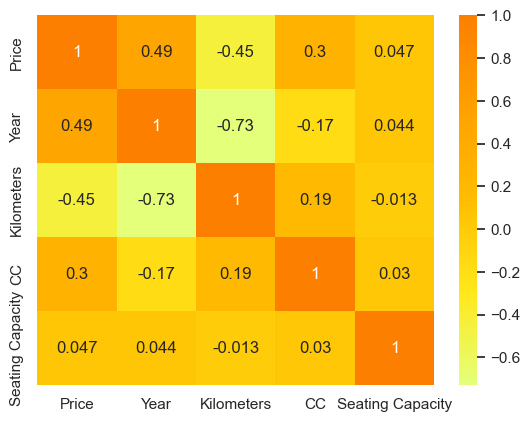

In [149]:
# Biểu đồ tương quan 
corr = df.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True)
plt.show()

không có mối tương quan giữa các biến.

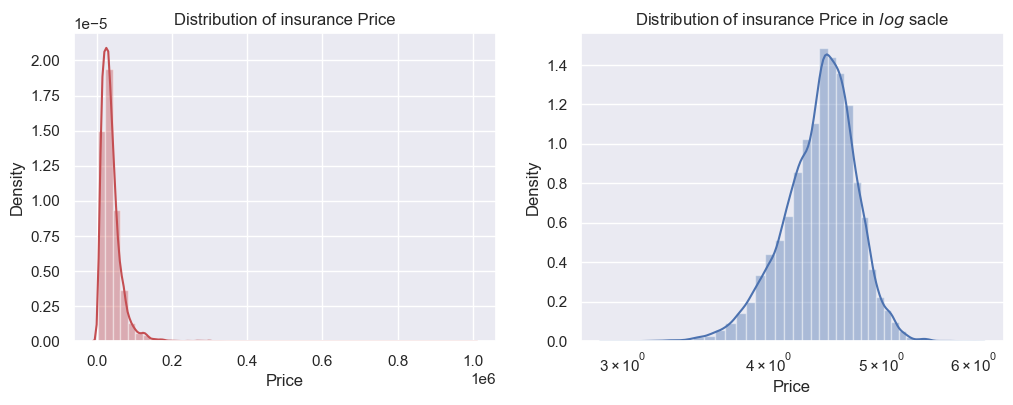

In [150]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df['Price'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance Price')

ax=f.add_subplot(122)
sns.distplot(np.log10(df['Price']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance Price in $log$ sacle')
ax.set_xscale('log')
plt.show()

In [151]:
feature=df.drop(['Price'],axis=1).values
target =df['Price'].values

In [152]:
from sklearn.model_selection import train_test_split
train,test,train_label,test_label=train_test_split(feature,target,test_size=0.2,random_state=42)

In [153]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression(fit_intercept=True)
model = reg.fit(train,train_label)
predict = model.predict(test)

In [159]:
from sklearn.metrics import mean_squared_error
mse_dt=mean_squared_error(test_label,predict)
rmse_dt=mse_dt**(1/2)
print (rmse_dt)

21268.54493548225
